In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import logging
from anndata import read_h5ad
import anndata as ad
import scanpy as sc
from graph_tool.all import Graph, graph_draw

In [16]:
from itertools import chain

In [33]:
import matplotlib.pyplot as plt

In [21]:
import pandas as pd

In [27]:
import seaborn as sns

In [18]:
from scipy.spatial.distance import cdist

In [3]:
from sklearn.neighbors import LocalOutlierFactor

In [4]:
import sys
sys.path.append("/data_nfs/je30bery/scxmatch-package/")
from scxmatch import test

will use the CPU to calculate the distance matrix.


In [5]:
adata = read_h5ad("/data_nfs/je30bery/processed_MimitouSmibert2021.hdf5")

/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
reference = "control"
test_group = "ZAP70"
group_by = "perturbation"

In [8]:
k = 100

In [13]:
subset = adata[adata.obs[group_by].isin([reference, test_group])].copy()
(p, z, s), G, m = test(subset, group_by=group_by, reference=reference, test_group=test_group, k=k, return_matching=True)

/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/scxmatch/core.py:104: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
test         1253
reference    1112
Name: count, dtype: int64
calculating kNN graph.
counting cross matches.


In [14]:
s

0.4913319238900634

In [36]:
used_elements = sorted(list(chain.from_iterable(m)))
distances = cdist(subset.X.todense(), subset.X.todense(), metric="sqeuclidean")
if np.min(distances) < 0:
    print("problem")

lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='precomputed')
pred = lof.fit_predict(np.abs(distances))
nof = lof.negative_outlier_factor_
outliers = pd.DataFrame(nof, columns=["Negative outlier factor"])

In [37]:
outliers["in matching"] = False
outliers.iloc[used_elements, 1] = True

Text(0.5, 1.0, 'Mimitou outlierness and matching inclusion with k=100')

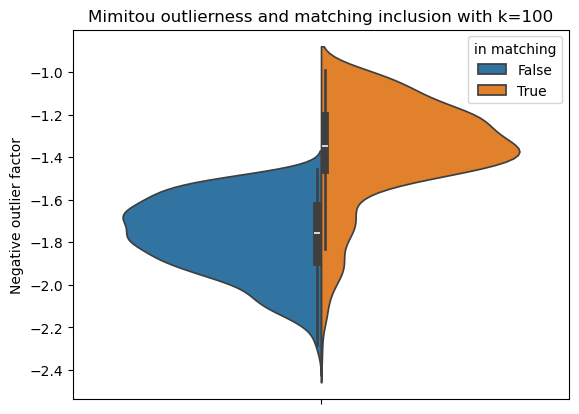

In [38]:
sns.violinplot(outliers, y="Negative outlier factor", hue="in matching", split=True)
plt.title("Mimitou outlierness and matching inclusion with k=100")

In [39]:
adata.obs["perturbation"].value_counts()

perturbation
ZAP70      1253
CD4        1167
control    1112
NFKB2      1024
CD3ECD4     639
CD3E        621
Name: count, dtype: int64

In [40]:
s

0.4913319238900634